20186663 소프트웨어학부 전찬웅

0. code

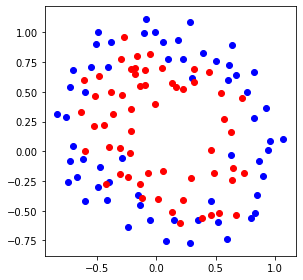

In [349]:
import numpy as np
import matplotlib.pyplot as plt

data    = np.genfromtxt("data-nonlinear.txt", delimiter=',')

pointX  = data[:, 0]
pointY  = data[:, 1]
label   = data[:, 2]

pointX0 = pointX[label == 0]
pointY0 = pointY[label == 0]

pointX1 = pointX[label == 1]
pointY1 = pointY[label == 1]

plt.figure()
plt.scatter(pointX0, pointY0, c='b')
plt.scatter(pointX1, pointY1, c='r')
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


In [350]:
theta = np.random.randn(1,15)
xy = np.array([1, pointX[0], pointY[0], pointX[0]**2, pointX[0]*pointY[0], pointY[0]**2,pointX[0]**3,pointX[0]**2*pointY[0],pointX[0]*pointY[0]**2,pointY[0]**3, pointX[0]**4,pointX[0]**3*pointY[0],pointX[0]**2*pointY[0]**2,pointX[0]*pointY[0]**3,pointY[0]**4])
for i in range(len(pointX)-1):
    xy = np.vstack([xy,np.array([1, pointX[i+1], pointY[i+1], pointX[i+1]**2, pointX[i+1]*pointY[i+1], pointY[i+1]**2,pointX[i+1]**3,pointX[i+1]**2*pointY[i+1], pointX[i+1]*pointY[i+1]**2, pointY[i+1]**3, pointX[i+1]**4,pointX[i+1]**3*pointY[i+1],pointX[i+1]**2*pointY[i+1]**2,pointX[i+1]*pointY[i+1]**3,pointY[i+1]**4])])
learning_rate = 0.005
print(np.shape(theta))
print(np.shape(xy))

(1, 15)
(118, 15)


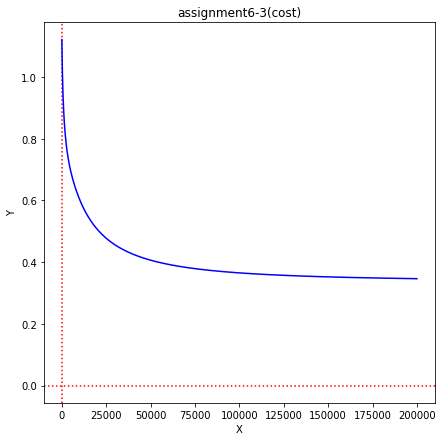

In [351]:
cost_ = []
accuracy_ = []
label_np = np.array(label)
label_np = label_np.reshape((1,118))
for i in range(200000):
    a=0
    g_function = np.dot(theta,xy.T)
    sigmoid_g = 1/(1+np.exp(-g_function))
    for j in range(len(pointX)):
        if label_np[0,j]== 1:
            if sigmoid_g[0,j]>0.5:
                a += 1
        else:
            if sigmoid_g[0,j]<0.5:
                a += 1
    accuracy_.append(a*100/len(pointX))
    cost = np.sum(-label_np*np.log(sigmoid_g)-(1-label_np)*np.log(1-sigmoid_g))/len(pointX)
    cost_.append(cost)
    for j in range(15):
        XY = xy[:,j]
        XY = XY.reshape((1,118))
        theta[0,j] = theta[0,j]-learning_rate*np.sum((sigmoid_g-label_np)*XY)/len(pointX)
plt.figure(figsize=(7, 7))
plt.axvline(x=0, color = 'r',linestyle=':')
plt.axhline(y=0, color = 'r',linestyle=':')
plt.title("assignment6-3(cost)")
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(range(200000),cost_,color='b')
plt.show()

In [352]:
print(theta)

[[ 3.3151819   2.03384973  3.7986943  -5.95416191 -4.63943796 -4.51741243
   0.9980497  -1.6159257  -0.7247281  -1.16417718 -5.00912665  0.55592737
  -2.00782251 -1.1755374  -5.01932374]]


/home/jeon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: The following kwargs were not used by contour: 'c'
  


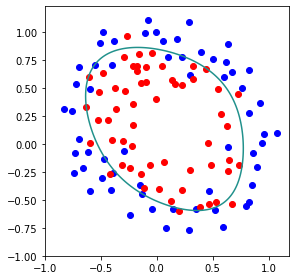

In [353]:
plt.figure()
x = np.linspace(-1, 1, 200)
y = np.linspace(-1, 1, 200)
XX, YY = np.meshgrid(x, y)
ZZ = np.zeros((200,200))
for i in range(200):
    for j in range(200):
        arrr = np.array([1,XX[i,j],YY[i,j],XX[i,j]**2,XX[i,j]*YY[i,j],YY[i,j]**2,XX[i,j]**3,XX[i,j]**2*YY[i,j],XX[i,j]*YY[i,j]**2,YY[i,j]**3,XX[i,j]**4,XX[i,j]**3*YY[i,j],XX[i,j]**2*YY[i,j]**2,XX[i,j]*YY[i,j]**3,YY[i,j]**4])
        arrr = arrr.reshape(15,1)
        ZZ[i,j] = np.dot(theta,arrr)

plt.scatter(pointX0, pointY0, c='b')
plt.scatter(pointX1, pointY1, c='r')
plt.contour(XX, YY, ZZ, c = 'g',levels=0)
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

# conclusion

1. Plot the training data

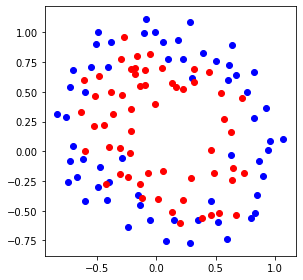

In [354]:
plt.figure()
plt.scatter(pointX0, pointY0, c='b')
plt.scatter(pointX1, pointY1, c='r')
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

2. Write down the high dimensional function g(x,y;theta)

#### $$g(x,y;\theta )=\theta_{0}+\theta_{1}x+\theta_{2}y+\theta_{3}x^2+\theta_{4}xy+\theta_{5}y^2+\theta_{6}x^3+\theta_{7}x^2y+\theta_{8}xy^2+\theta_{9}y^3+\theta_{10}x^4+\theta_{11}x^3y+\theta_{12}x^2y^2+\theta_{13}xy^3+\theta_{14}y^4$$

3. Plot the training error

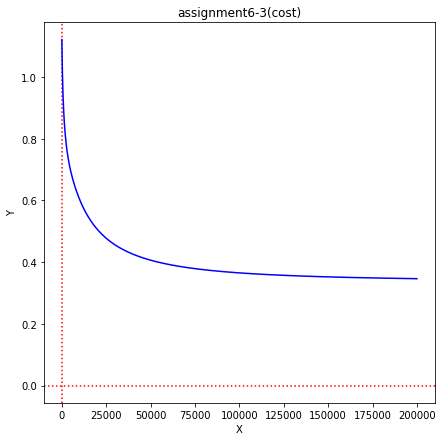

In [355]:
plt.figure(figsize=(7, 7))
plt.axvline(x=0, color = 'r',linestyle=':')
plt.axhline(y=0, color = 'r',linestyle=':')
plt.title("assignment6-3(cost)")
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(range(200000),cost_,color='b')
plt.show()

4. Plot the training accuracy 

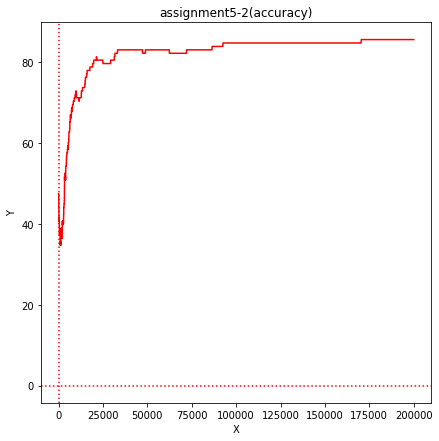

In [356]:
plt.figure(figsize=(7, 7))
plt.axvline(x=0, color = 'r',linestyle=':')
plt.axhline(y=0, color = 'r',linestyle=':')
plt.title("assignment5-2(accuracy)")
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(range(200000),accuracy_,color='r')
plt.show()

5. Write down the final training accuracy 

In [357]:
acc = a*100/len(pointX)
print(acc)

85.59322033898304


6. Plot the optimal classifier superimposed on the training data 

/home/jeon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: The following kwargs were not used by contour: 'c'
  This is separate from the ipykernel package so we can avoid doing imports until


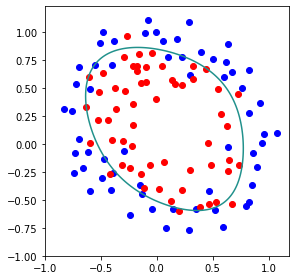

In [358]:
plt.scatter(pointX0, pointY0, c='b')
plt.scatter(pointX1, pointY1, c='r')
plt.contour(XX, YY, ZZ, c = 'green',levels=0)
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()